   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy:  1.0


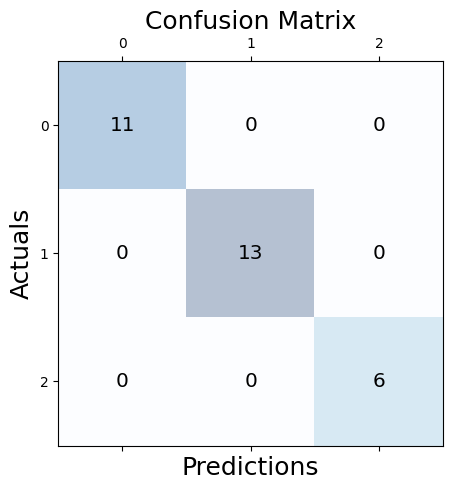

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_iris

# Comment this out if you are using Jupyter Notebook (it's for JupyterLab or VSCode)
# %matplotlib inline 

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame just for the sake of visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y

# Display the first five rows of the dataframe
print(df.head())

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 80% training and 20% test

# Create Logistic Regression model
logreg = LogisticRegression(max_iter=200)

# Train the model using the training sets
logreg.fit(X_train, y_train)

# Predictions on the Test dataset
y_pred = logreg.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

# Accuracy
print("Accuracy: ", logreg.score(X_test, y_test))

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='x-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [3]:
import plotly.express as px

px.imshow(conf_matrix, text_auto=True)